<a href="https://colab.research.google.com/github/octet07/task5/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/AIML/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


 1.Train a Decision Tree Classifier and visualize the tree.

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

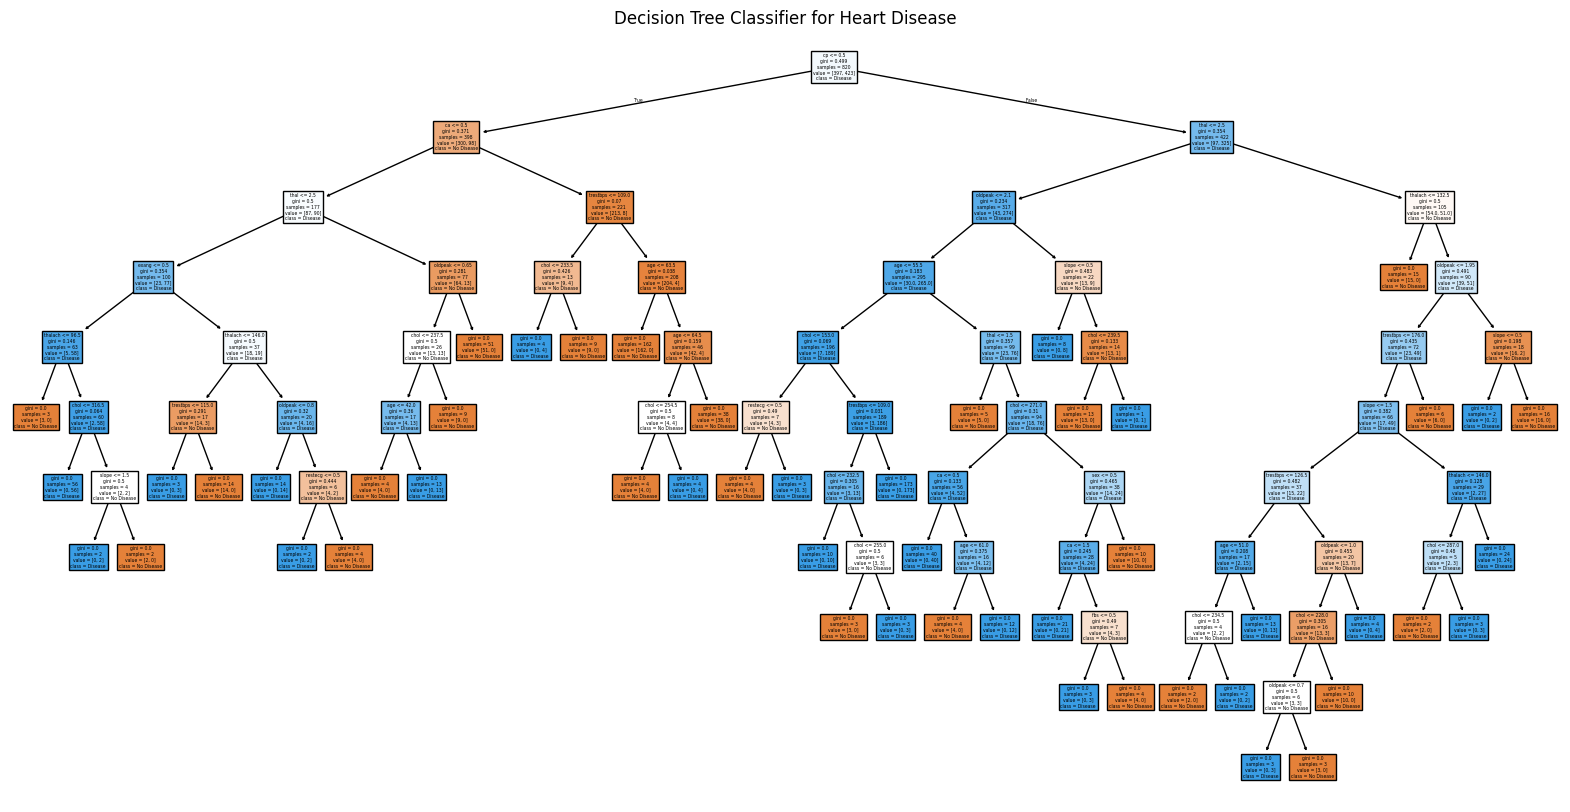

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 6. Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Classifier for Heart Disease")
plt.show()

 2.Analyze overfitting and control tree depth.

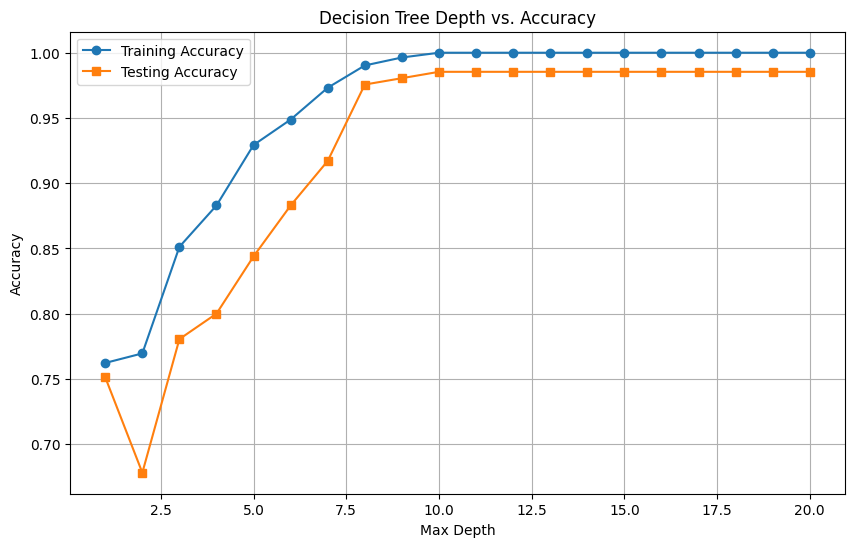

In [7]:

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Evaluate accuracy for different tree depths
train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot train vs. test accuracy
plt.figure(figsize=(10,6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()


 3.Train a Random Forest and compare accuracy.

In [8]:
# 1. Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# 2. Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 3. Evaluate accuracy
from sklearn.metrics import accuracy_score

# Random Forest Accuracy
rf_train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_clf.predict(X_test))

# Decision Tree Accuracy (with default or best depth)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_train_acc = accuracy_score(y_train, dt_clf.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt_clf.predict(X_test))

# 4. Print comparison
print("Model Comparison:")
print(f"Decision Tree - Train Accuracy: {dt_train_acc:.3f}, Test Accuracy: {dt_test_acc:.3f}")
print(f"Random Forest - Train Accuracy: {rf_train_acc:.3f}, Test Accuracy: {rf_test_acc:.3f}")


Model Comparison:
Decision Tree - Train Accuracy: 1.000, Test Accuracy: 0.985
Random Forest - Train Accuracy: 1.000, Test Accuracy: 0.985


4.Interpret feature importances.

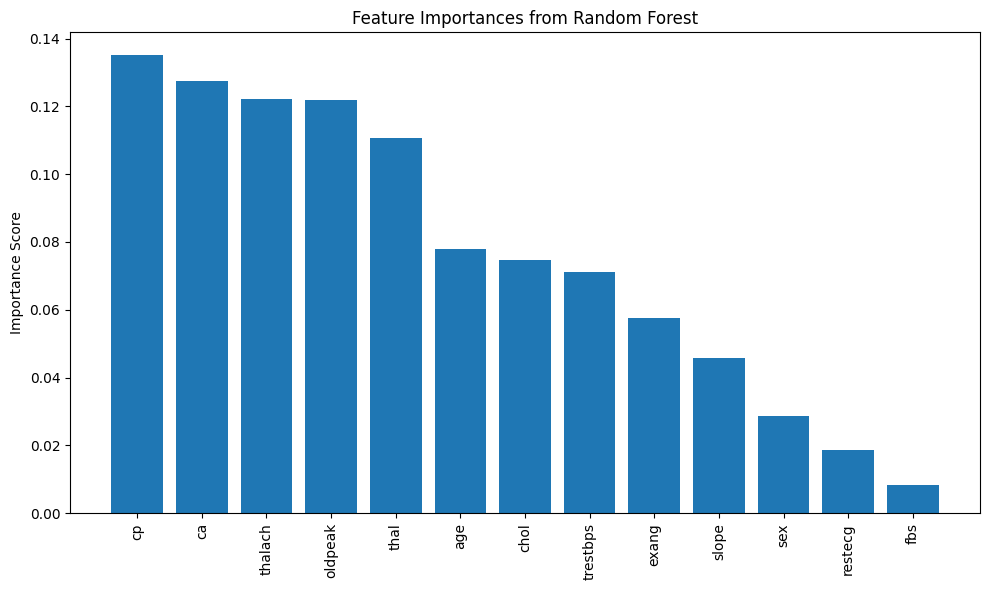

Top 5 Most Important Features:
cp: 0.1351
ca: 0.1273
thalach: 0.1222
oldpeak: 0.1219
thal: 0.1105


In [9]:
# 1. Get feature importances from Random Forest
import numpy as np
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]  # sort in descending order

# 2. Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# 3. Optionally: Print top features
print("Top 5 Most Important Features:")
for i in range(5):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")


 5.Evaluate using cross-validation

In [10]:
from sklearn.model_selection import cross_val_score

# 1. Evaluate Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')

# 2. Evaluate Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')

# 3. Print Mean Accuracy and Standard Deviation
print("Cross-Validation Results (5-fold):")
print(f"Decision Tree - Mean Accuracy: {dt_scores.mean():.3f}, Std Dev: {dt_scores.std():.3f}")
print(f"Random Forest - Mean Accuracy: {rf_scores.mean():.3f}, Std Dev: {rf_scores.std():.3f}")


Cross-Validation Results (5-fold):
Decision Tree - Mean Accuracy: 1.000, Std Dev: 0.000
Random Forest - Mean Accuracy: 0.997, Std Dev: 0.006
